In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
matplotlib.rcParams['font.size']=18
matplotlib.rcParams['xtick.labelsize']=18
matplotlib.rcParams['ytick.labelsize']=18


import numpy as np
import pandas as pd
# import requests
# import urllib.request
# from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
# from sklearn.svm import SVC
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


# from sklearn import model_selection


In [2]:
res=[]
dfAll=pd.DataFrame()
for year in np.arange(2017,2003,-1):
    df=pd.read_csv('data/games/tourn_games_'+str(year)+'.csv',index_col=0)
    dfAll=dfAll.append(df,ignore_index=True)


df2=dfAll.copy()
index=df2.keys()
index
df2.columns=[indx.replace('_1','_xx').replace('_2','_1').replace('_xx','_2') for indx in index]
df2.outcome=1-df2.outcome

dfAll=(df2.append(dfAll))

## Clean dataframe

In [3]:
dropLabels=['outcome', 'region']
dropLabels.append('round')
for t12 in ['1', '2']:
    dropLabels.append('School_'+t12)
    dropLabels.append('name_'+t12)
    dropLabels.append('fullName_'+t12)
    dropLabels.append('Conf_'+t12)
    dropLabels.append('wpct_'+t12)
    dropLabels.append('Rank_'+t12)
    dropLabels.append('WL_'+t12)
    dropLabels.append('sched_url_'+t12)
    dropLabels.append('name_'+t12)
    dropLabels.append('TmPts_'+t12)
    dropLabels.append('OppPts_'+t12)
    dropLabels.append('SRS_'+t12)
#     dropLabels.append('SOS_'+t12)
#     dropLabels.append('seed_'+t12)
    dropLabels.append('AdjEM_'+t12)
    dropLabels.append('AdjEM.1_'+t12)
#     dropLabels.append('AdjO_'+t12)
#     dropLabels.append('AdjD_'+t12)
#     dropLabels.append('AdjT_'+t12)
#     dropLabels.append('Luck_'+t12)
    

In [4]:
dfClean=dfAll.drop(dropLabels,axis=1).dropna(axis=1)
featuresTMP=dfClean.keys()
features=[l.replace('_1','') for l in featuresTMP[::2]]
dfNew=pd.DataFrame()
for lab in features:
    dfNew[lab]=dfClean[lab+'_1']-dfClean[lab+'_2']
    
dfClean=dfNew
features=np.array(sorted(dfClean.columns))
features

array(['3PAr', 'AST%', 'AdjD', 'AdjO', 'AdjT', 'BLK%', 'FT/FGA', 'FTr',
       'Luck', 'NCSOS_AdjEM', 'OppD', 'OppO', 'SOS', 'TOV%', 'TRB%', 'TS%',
       'eFG%', 'seed'],
      dtype='<U11')

# Check various models



## Check vs. seeding

In [5]:
n_fold = 10
test_size = 0.3


Xfeatures=dfClean['seed'].values.reshape(-1,1)

scaler=StandardScaler().fit(Xfeatures)
scaled=scaler.transform(Xfeatures)
X=scaled

y=dfAll['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)


X=X_train
y=y_train

model=RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state=0)
model.fit(X_train, y_train)

for scoring in ['roc_auc' , 'accuracy', 'precision', 'recall']:
    results = cross_val_score(model, X, y, scoring=scoring)
    print(scoring, ': ', results.mean(), ' +/- ', results.std())


roc_auc :  0.762369049074  +/-  0.032535299785
accuracy :  0.694498381877  +/-  0.0144076564981
precision :  0.693079365079  +/-  0.0116490202361
recall :  0.730670064682  +/-  0.0548060940388


## Random Forest

In [6]:
# features=np.delete(features,np.where(features=='seed')[0])

In [67]:
StandardScaler?

In [66]:
scaler=StandardScaler().fit(dfClean)
scaled=scaler.transform(dfClean)
X=scaled

X[1,:]


array([ 0.3844388 ,  0.5898716 ,  1.56581899,  0.25990363,  1.16460384,
       -0.70187457,  1.86849791,  1.86849791,  0.91725251, -1.104788  ,
        0.2880755 , -0.14266471, -0.14697528,  0.52629793, -1.84805365,
        1.78199884,  1.30470379,  0.1312936 ])

In [65]:
dfClean.iloc[1]

3PAr            0.028
AST%            4.100
AdjD           11.400
AdjO            2.200
AdjT            5.000
BLK%           -2.800
FT/FGA          0.089
FTr             0.089
Luck            0.056
NCSOS_AdjEM    -6.690
OppD            1.100
OppO           -0.600
SOS            -1.020
TOV%            1.200
TRB%           -6.500
TS%             0.061
eFG%            0.048
seed            1.000
Name: 1, dtype: float64

In [7]:
n_fold = 10
test_size = 0.3


dfClean=dfClean[features]

scaler=StandardScaler().fit(dfClean)
scaled=scaler.transform(dfClean)
X=scaled

y=dfAll['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)


X=X_train
y=y_train

randFor=RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state=0)
randFor.fit(X_train, y_train)

for scoring in ['roc_auc' , 'accuracy', 'precision', 'recall']:
    results = cross_val_score(randFor, X, y, scoring=scoring)
    print(scoring, ': ', results.mean(), ' +/- ', results.std())
    
    


roc_auc :  0.813765705109  +/-  0.0353299482915
accuracy :  0.751965427421  +/-  0.0390200661809
precision :  0.771033507292  +/-  0.0403094011192
recall :  0.736951921071  +/-  0.0368513927007


## Logistic regression

In [8]:
n_fold = 10
test_size = 0.3


dfClean=dfClean[features]

scaler=StandardScaler().fit(dfClean)
scaled=scaler.transform(dfClean)
X=scaled

y=dfAll['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)


X=X_train
y=y_train

c=.2
logReg = LogisticRegression(C=c,penalty='l1',fit_intercept=True)
logReg.fit(X_train, y_train)

kfold = KFold(n_splits=n_fold, random_state=10)


scoring = 'roc_auc' #['accuracy','precision']
for scoring in ['roc_auc' , 'accuracy', 'precision', 'recall']:
    results = cross_val_score(logReg, X, y, scoring=scoring)
    print(scoring, ': ', results.mean(), ' +/- ', results.std())

results = cross_val_score(logReg, X, y, scoring=scoring)    
    

roc_auc :  0.881365883525  +/-  0.0182117702082
accuracy :  0.802233799037  +/-  0.0235493152833
precision :  0.804949870013  +/-  0.028965965641
recall :  0.814189692688  +/-  0.0298165001424


In [9]:
features[np.where(logReg.coef_!=0)[1]]
len(features[np.where(logReg.coef_!=0)[1]])
features[np.where(logReg.coef_==0)[1]]
# features

array(['3PAr', 'BLK%', 'SOS', 'TS%', 'eFG%'],
      dtype='<U11')

In [21]:
logReg.coef_

array([[ 0.        , -0.16252314, -2.2220571 ,  2.37721102,  0.07744905,
         0.        , -0.0253134 , -0.0308123 ,  0.80505313,  0.12069544,
        -0.04350548,  0.46587007,  0.        , -0.11845478, -0.04823727,
         0.        ,  0.        ,  1.65784432]])

In [36]:
np.argsort?

In [32]:
logReg.coef_[0]

array([ 0.        , -0.16252314, -2.2220571 ,  2.37721102,  0.07744905,
        0.        , -0.0253134 , -0.0308123 ,  0.80505313,  0.12069544,
       -0.04350548,  0.46587007,  0.        , -0.11845478, -0.04823727,
        0.        ,  0.        ,  1.65784432])

In [33]:
indx

array([ 4,  5,  8, 11,  3, 10,  7,  0,  9,  6, 12,  1,  2])

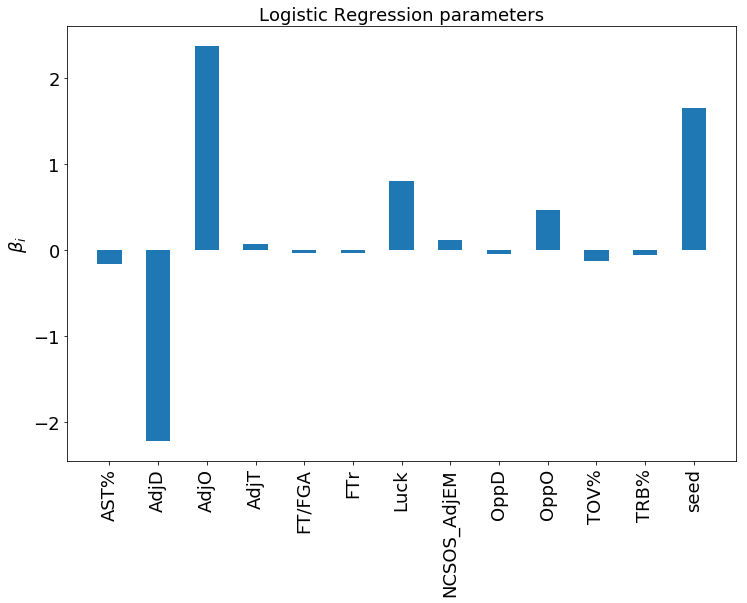

In [45]:
ndata=(logReg.coef_!=0).sum()
indx=np.where((logReg.coef_!=0))[1]

plt.bar(np.arange(ndata), logReg.coef_[0][indx],width=0.5)
labels=dfClean.keys()[indx];
plt.xticks(np.arange(ndata), labels, rotation='vertical');
plt.gca().tick_params(labelsize=18)
plt.title('Logistic Regression parameters',size=18);
plt.ylabel('$\\beta_i$',size=18);

# plt.x

In [52]:
labels

Index(['AST%', 'AdjD', 'AdjO', 'AdjT', 'FT/FGA', 'FTr', 'Luck', 'NCSOS_AdjEM',
       'OppD', 'OppO', 'TOV%', 'TRB%', 'seed'],
      dtype='object')

In [56]:
np.argsort?

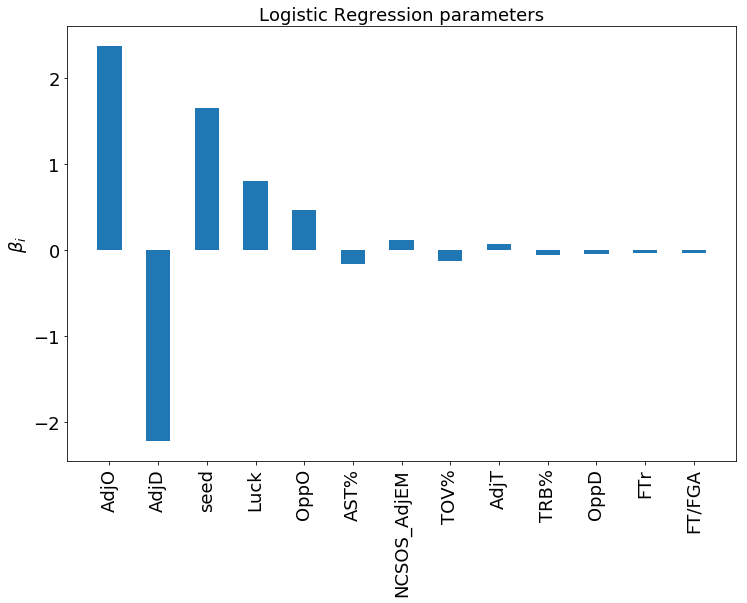

In [57]:

indx=np.where((logReg.coef_!=0))[1]

indxSort=np.argsort(-np.abs(logReg.coef_[0][indx]))
indx=indx[indxSort]
ndata=len(indx)

plt.bar(np.arange(ndata), logReg.coef_[0][indx],width=0.5)
labels=dfClean.keys()[indx];
plt.xticks(np.arange(ndata), labels, rotation='vertical');
plt.gca().tick_params(labelsize=18)
plt.title('Logistic Regression parameters',size=18);
plt.ylabel('$\\beta_i$',size=18);

# plt.x

## Traditional Pythagoean win percentage with log5 

In [11]:
def pythag(pf,pa,exp=11.5):
    return (pf**exp)/(pa**exp+pf**exp)

def pythagGame(df_game,exp=11.5):
    p={}
    for iteam in np.arange(1,3):
        pf = df_game['AdjO_'+str(iteam)]
        pa = df_game['AdjD_'+str(iteam)]
        p[str(iteam)] = pythag(pf,pa,exp)
        
    return p['1']*(1.-p['2'])/(p['1']+p['2']-2.*p['1']*p['2'])
    

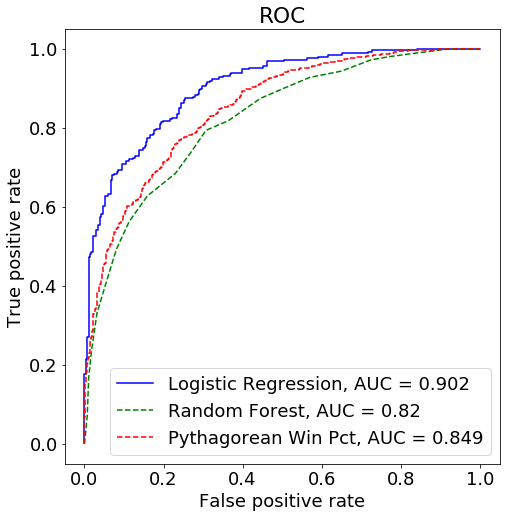

In [12]:
y_predPythag=pythagGame(dfAll)

fpr,tpr,thr=roc_curve(y_test,logReg.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,'b',label='Logistic Regression, AUC = '+str(round(roc_auc_score(y_test,logReg.predict_proba(X_test)[:,1]),3)))

fpr,tpr,thr=roc_curve(y_test,randFor.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,'g--',label='Random Forest, AUC = '+str(round(roc_auc_score(y_test,randFor.predict_proba(X_test)[:,1]),3)))

fpr,tpr,thr=roc_curve(dfAll['outcome'],y_predPythag)
plt.plot(fpr,tpr,'r--',label='Pythagorean Win Pct, AUC = '+str(round(roc_auc_score(dfAll['outcome'],y_predPythag),3)))


plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')

ax=plt.gca()
ax.set_aspect(1)

Text(0,0.5,'Predicted')

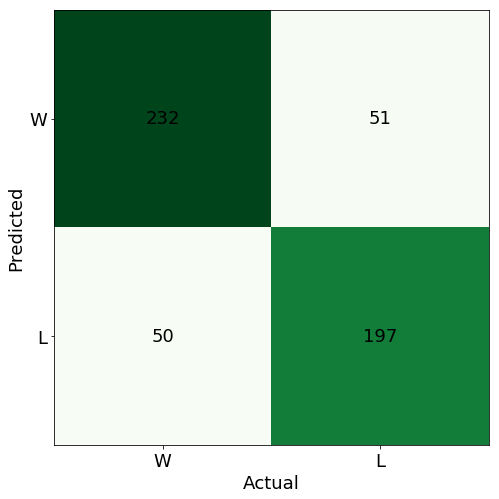

In [13]:
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
conf_arr=confusion_matrix(y_test,logReg.predict(X_test))
res = plt.imshow(conf_arr,cmap='Greens')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

# cb = fig.colorbar(res)
alphabet = 'WL'
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.xlabel('Actual')
plt.ylabel('Predicted')


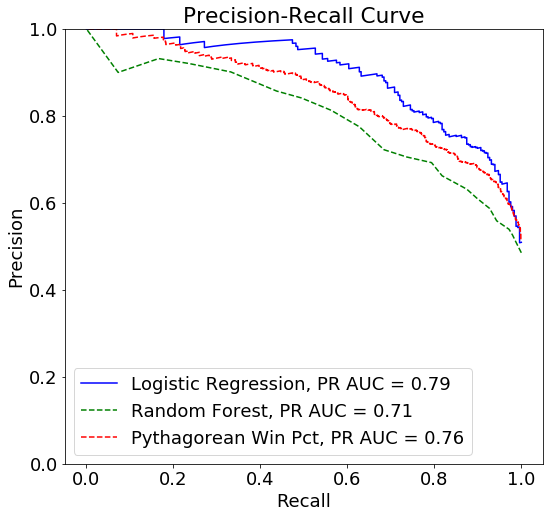

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,precision_recall_curve, precision_score

precision,recall,thr=precision_recall_curve(y_test,logReg.predict_proba(X_test)[:,1])
plt.plot(recall,precision,'b',label='Logistic Regression, PR AUC = '+
         str(round(precision_score(y_test,logReg.predict_proba(X_test)[:,1]>0.5),2)))

precision,recall,thr=precision_recall_curve(y_test,randFor.predict_proba(X_test)[:,1])
plt.plot(recall,precision,'g--',label='Random Forest, PR AUC = '+
         str(round(precision_score(y_test,randFor.predict_proba(X_test)[:,1]>0.5),2)))

precision,recall,thr=precision_recall_curve(dfAll['outcome'],y_predPythag)
plt.plot(recall,precision,'r--',label='Pythagorean Win Pct, PR AUC = '+str(round(precision_score(dfAll['outcome'],y_predPythag>0.5),2)))


plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.ylim(0,1)
ax=plt.gca()
ax.set_aspect(1)

# Dump model and features to file

In [15]:
import pickle
from sklearn.externals import joblib
joblib.dump(logReg, 'app/model.pkl') 
joblib.dump(logReg, './model.pkl') 

features=dfClean.columns
joblib.dump(features,'app/features.pkl')
joblib.dump(features,'./features.pkl')

clf = joblib.load('app/model.pkl') 
featuresX=joblib.load('app/features.pkl')

pickle.dump(scaler, open('app/scaler.pkl', 'wb'))
pickle.dump(scaler, open('./scaler.pkl', 'wb'))



In [16]:
scaler=pickle.load(open('./scaler.pkl','rb'))
scaleX=scaler.transform(dfClean.values)

row=1
print(dfAll.loc[row][['name_1','name_2']].values)
print(clf.predict_proba(X)[row,:])

[['virginia-tech' 'wisconsin']
 ['wisconsin' 'virginia-tech']]
[ 0.67294379  0.32705621]


# Show logistic regression plot

In [58]:
def logit(x):
    return 1./(1.+np.exp(-x))
# logit(X_test.dot(model.coef_.T)).values-model.predict_proba(X_test)[:,1,None]

In [59]:
X_test.shape

(530, 18)

(-5, 5)

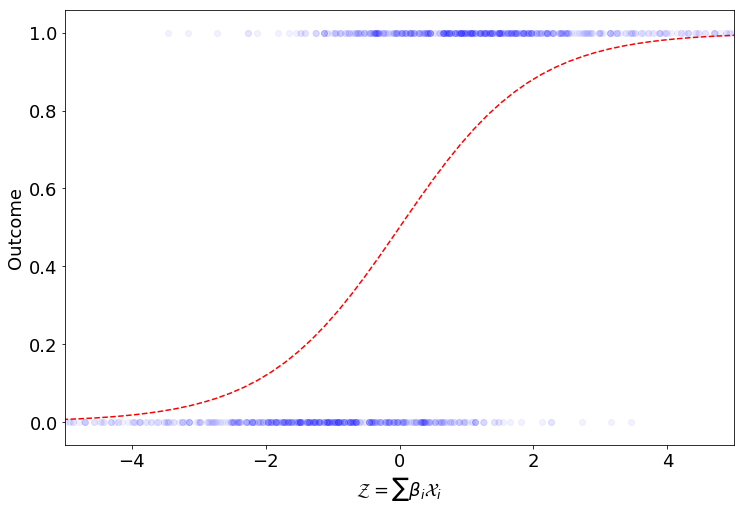

In [60]:
xcoord = X_test.dot(logReg.coef_.T)
plt.scatter(xcoord, y_test,color=[0,0,1,.05])
plt.scatter(-xcoord, 1-y_test,color=[0,0,1,.05])
plt.xlabel('${\cal Z}=\sum \\beta_i {\cal X}_i$',size=18)
plt.ylabel('Outcome',size=18)
plt.gca().tick_params(labelsize=18)

x=np.linspace(-10,10,100)
plt.plot(x,logit(x),'r--')
plt.xlim(-5,5)

# Test with teams split by k-means and PCA

In [107]:
resultList=[]
for yr in np.arange(2017,2003,-1):
    year=str(yr)
    teamType=pd.read_csv('data/team_type_'+year+'.csv')
    teamTypeDict={}
    for r in teamType.values:
        teamTypeDict[r[0]]=r[1]

    df=pd.read_csv('data/games/all_games_'+year+'.csv',index_col=0).dropna(axis=1)
    # df=pd.read_csv('data/games/tourn_games_2016.csv',index_col=0)
    # y=df['outcome']
    dropLabels=['School_1','Conf_1','wpct_1','Rank_1','WL_1','sched_url_1',\
                'School_2','Conf_2','wpct_2','Rank_2','WL_2','sched_url_2', 'outcome']

    y=df['outcome']


    types=[]
    for r in df.itertuples():

        t1=teamTypeDict[r.School_1]
        t2=teamTypeDict[r.School_2]

        types.append(str(min(t1,t2))+str(max(t1,t2)))

    df['types']=types

    runsum=0
    numsum=0
    pythsum=0

    nlab=3
    for t1lab in range(nlab):
        for t2lab in np.arange(t1lab,nlab):
            lab = str(t1lab)+str(t2lab)

            dfSel = df[(df.types==lab)]
            dropLabels.append('types')

            X=dfSel.drop(dropLabels,axis=1)
            y=dfSel['outcome']


            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
            logreg = LogisticRegression()
            logreg.fit(X_train, y_train)

            y_pred=logreg.predict(X_test)
            print(lab,len(y_pred))
            print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


            y_predPythag=pythagGame(X_test)

            print('Accuracy using pythagorean win expectation: ',(np.round(y_predPythag)==y_test).sum()/len(y_test))


            kfold = model_selection.KFold(n_splits=10, random_state=7)
            modelCV = LogisticRegression()
            scoring = 'accuracy'
            results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
            print("10-fold cross validation average accuracy: %.3f" % (results.mean()))    

            runsum+= len(y_pred) * results.mean() #logreg.score(X_test, y_test)
            numsum+= len(y_pred)
            pythsum+= len(y_pred) *(np.round(y_predPythag)==y_test).sum()/len(y_test)



    print ()
    print (runsum/numsum)
    print (pythsum/numsum)
    
    resultList.append([year,(runsum/numsum),pythsum/numsum])
    
resDFKM=pd.DataFrame(resultList,columns=['year','Log reg','Pythag'])


00 613
Accuracy of logistic regression classifier on test set: 0.67
Accuracy using pythagorean win expectation:  0.68515497553
10-fold cross validation average accuracy: 0.669
01 281
Accuracy of logistic regression classifier on test set: 0.84
Accuracy using pythagorean win expectation:  0.79359430605
10-fold cross validation average accuracy: 0.830
02 940
Accuracy of logistic regression classifier on test set: 0.77
Accuracy using pythagorean win expectation:  0.76170212766
10-fold cross validation average accuracy: 0.754
11 388
Accuracy of logistic regression classifier on test set: 0.65
Accuracy using pythagorean win expectation:  0.682989690722
10-fold cross validation average accuracy: 0.669
12 287
Accuracy of logistic regression classifier on test set: 0.92
Accuracy using pythagorean win expectation:  0.91637630662
10-fold cross validation average accuracy: 0.922
22 530
Accuracy of logistic regression classifier on test set: 0.70
Accuracy using pythagorean win expectation:  0.6943

10-fold cross validation average accuracy: 0.627
12 638
Accuracy of logistic regression classifier on test set: 0.82
Accuracy using pythagorean win expectation:  0.815047021944
10-fold cross validation average accuracy: 0.799
22 674
Accuracy of logistic regression classifier on test set: 0.68
Accuracy using pythagorean win expectation:  0.695845697329
10-fold cross validation average accuracy: 0.650

0.734948243054
0.771009174312
00 612
Accuracy of logistic regression classifier on test set: 0.64
Accuracy using pythagorean win expectation:  0.62091503268
10-fold cross validation average accuracy: 0.644
01 431
Accuracy of logistic regression classifier on test set: 0.88
Accuracy using pythagorean win expectation:  0.867749419954
10-fold cross validation average accuracy: 0.845
02 646
Accuracy of logistic regression classifier on test set: 0.77
Accuracy using pythagorean win expectation:  0.78173374613
10-fold cross validation average accuracy: 0.764
11 406
Accuracy of logistic regressio

In [109]:
resDFKM.mean()

year       1.440858e+54
Log reg    7.391709e-01
Pythag     7.464952e-01
dtype: float64

In [116]:

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.578


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
# logreg = LogisticRegression(C=1,penalty='l1',tol=0.1)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.70


In [11]:
df['pythag']=pythagGame(df)

In [15]:
y_predPythag=pythagGame(X_test)

print('Accuracy using pythagorean win expectation: ',(np.round(y_predPythag)==y_test).sum()/len(y_test))
# print(len(y_test))

Accuracy using pythagorean win expectation:  0.739459815547
